In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

pop = pd.read_csv('../data/population.csv', skiprows=4)
pop.rename(columns=lambda c: c.lower().replace(' ', '_'), inplace=True)
pop.drop(['indicator_name', 'indicator_code','unnamed:_60', '2015'], axis=1, inplace=True)
pop = pd.melt(pop, id_vars=['country_name', 'country_code'], var_name='year', value_name='population')
pop.year = pd.to_numeric(pop.year)
pop['log_pop'] = np.log(pop.population)
pop.head()

,country_name,country_code,year,population,log_pop
0,Aruba,ABW,1960,54208.0,10.900584
1,Andorra,AND,1960,13414.0,9.504054
2,Afghanistan,AFG,1960,8994793.0,16.012156
3,Angola,AGO,1960,5270844.0,15.477701
4,Albania,ALB,1960,1608800.0,14.290999


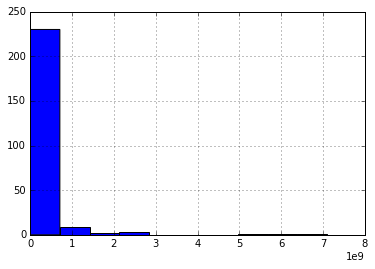

In [34]:
pop[pop.year==2012].population.hist(bins=10)

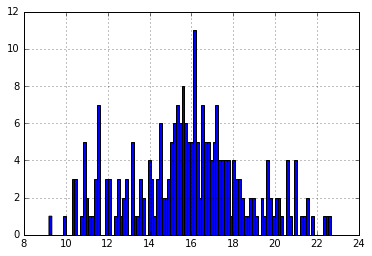

In [35]:
pop[pop.year==2012].log_pop.hist(bins=100)

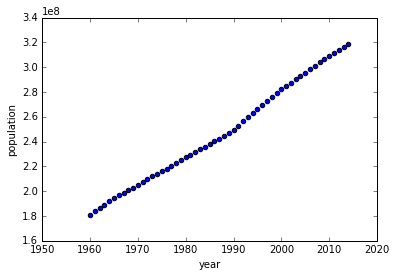

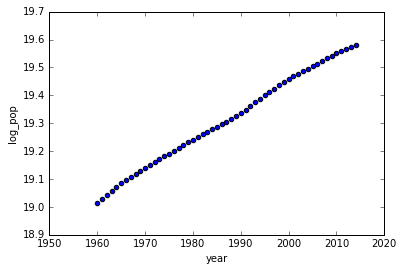

In [36]:
pop[pop.country_name == 'United States'].plot(kind='scatter', x='year', y='population')
pop[pop.country_name == 'United States'].plot(kind='scatter', x='year', y='log_pop')

In [21]:
usa = pop[pop.country_name == 'United States'].copy()
# usa.plot(kind='scatter', x='year', y='population')

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(usa[['year']], usa['population'])

usa['pred'] = model.predict(usa[['year']])
pred_pop = model.predict(usa[['year']])


In [24]:
mean_absolute_error(pred_pop, usa.population), np.sqrt(mean_squared_error(pred_pop, usa.population))

(2480521.6012278991, 2816828.3572805291)

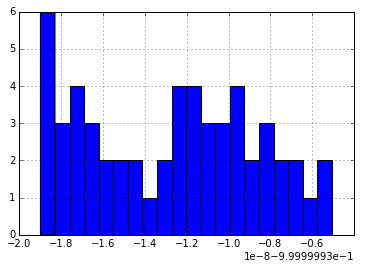

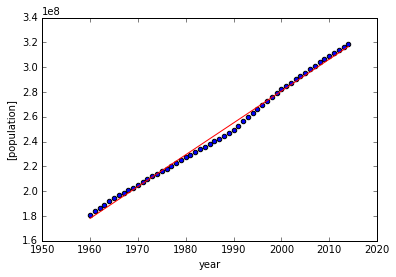

In [41]:

error = pd.Series((pred_pop -usa.population)/usa.population)
error.hist(bins=20)
usa.plot(x='year', y=['population'], kind='scatter')
plt.plot(usa.year, usa.pred, c='red')

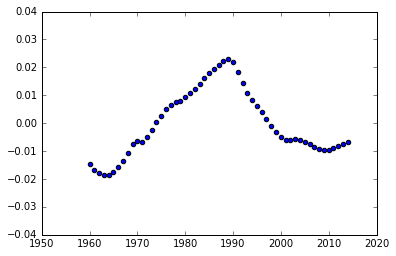

In [43]:
plt.scatter(usa.year, (usa.pred -usa.population)/usa.population )

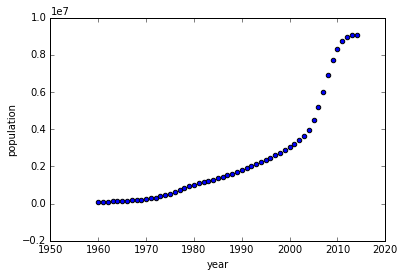

In [27]:
uae = pop[pop.country_code=='ARE'].copy()
from sklearn.linear_model import LinearRegression

model_uae = LinearRegression()
model_uae.fit(uae[['year']], uae['log_pop'])

pred_pop = model_uae.predict(uae[['year']])

# Plot UAE Population
uae.plot(kind='scatter', x='year', y='population')
# Plot prediction from log
plt.plot(uae.year, np.exp(pred_pop) )
error = pd.Series((pred_pop -uae.log_pop))


In [21]:
pop

,country_name,country_code,year,pop
0,Aruba,ABW,1960,5.420800e+04
1,Andorra,AND,1960,1.341400e+04
2,Afghanistan,AFG,1960,8.994793e+06
3,Angola,AGO,1960,5.270844e+06
4,Albania,ALB,1960,1.608800e+06
5,Arab World,ARB,1960,9.249590e+07
6,United Arab Emirates,ARE,1960,9.261200e+04
7,Argentina,ARG,1960,2.061908e+07
8,Armenia,ARM,1960,1.867396e+06
9,American Samoa,ASM,1960,2.001200e+04
